# Lab: Housing Price Predictions - EDA  and Cleaning

### Contents:
- [Setup](#Setup)
- [Qualitative Feature Exploration](#Qualitative-Feature-Exploration)
- [Quantitave Feature Exploration](#Quantitave-Feature-Exploration)
- [Export Clean CSV files](#Export-Clean-CSV-files)

### Setup
---

In [1]:
#Libraries Used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import core data sets
house_validate = pd.read_csv('../datasets/validate.csv')
house_data = pd.read_csv('../datasets/train.csv')

In [3]:
house_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


I chose the following features I will initially fit into a model and see how successfull it is. They are:
* neighborhood
* overall_cond: Overall Condition
* bldg_type: Type of Dwelling
* ~~utilities: Type of utilities available~~ Chose not to use
* kitchen_qual: Kitchen Quality
* central_air: Central Air Installed
* gr_liv_area: Area of Living Room
* garage_area:Area of Garage
* total_bsmt_sf: Area of Basement
* 1st_flr_sf: Area of First Floor
* bedroom_abvgr: Number of Bedrooms Above Ground
* overall_qual: Overall Quality of Home
* exter_qual: Exterior Quality of Home
* year_built: Year the Home Was Built

In [4]:
#Fix column names
house_validate.columns= [col.replace(' ', '_').lower() for col in house_validate.columns]
house_data.columns= [col.replace(' ', '_').lower() for col in house_data.columns]

### Qualitative Feature Exploration
___

#### Neighborhood Feature Cleaning & EDA

In [5]:
#Neighborhood column does not have any nulls
print(house_data['neighborhood'].isna().sum())
house_validate['neighborhood'].isna().sum()

0


0

I don't see the three neighborhoods with lowest data points listed in the dictionary (Greens, GrnHill, Landmrk).  The validate data doesn't have any GrnHill or Landmrk so I will drop those rows.

In [6]:
house_data['neighborhood'].nunique(), house_validate['neighborhood'].nunique()

(28, 26)

In [7]:
house_data['neighborhood'].unique(), house_validate['neighborhood'].unique()

(array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
        'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
        'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
        'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
        'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object),
 array(['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr',
        'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards',
        'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor',
        'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill',
        'Greens', 'Blueste'], dtype=object))

In [8]:
#Dropping alll rows where neighborhoods are listed as Greens, GrnHill, and Landmrk - NEED TO DO FOR BOTH DATA AND VALIDATE CSVS
#house_data.drop(house_data[house_data['neighborhood'].isin(['Greens', 'GrnHill', 'Landmrk'])].index, inplace = True)
#house_validate.drop(house_validate[house_validate['neighborhood'].isin(['Greens', 'GrnHill', 'Landmrk'])].index, inplace = True)


In [9]:
# Confirming correct data was dropped.  Both now have 25 values for the neighborhood feature
house_data['neighborhood'].nunique(),house_validate['neighborhood'].nunique()


(28, 26)

Based on this scatterplot, I think there one could narrow down the price of a home based on what neighborhood it's located.

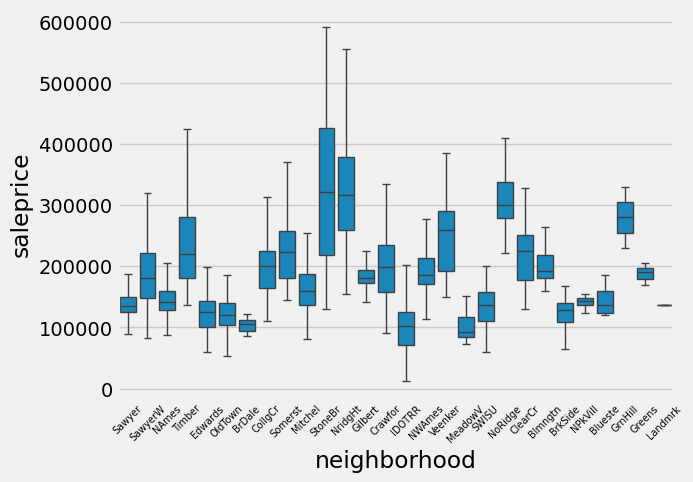

In [95]:
# Is there any relationship betweeen Neighborhood and Sale Price?

# neighborhood_order = house_data.groupby('neighborhood')['saleprice'].median().sort_values().index.tolist() --Saving this for later - not my idea.
# Mentor suggested putting them in order with descending = False, but that won't work.  Want to look at it more later for both boxplot 
# and scatter plot

sns.boxplot(data = house_data, x = 'neighborhood', y = 'saleprice', showfliers = False)
plt.xticks(rotation = 45, fontsize = 7);

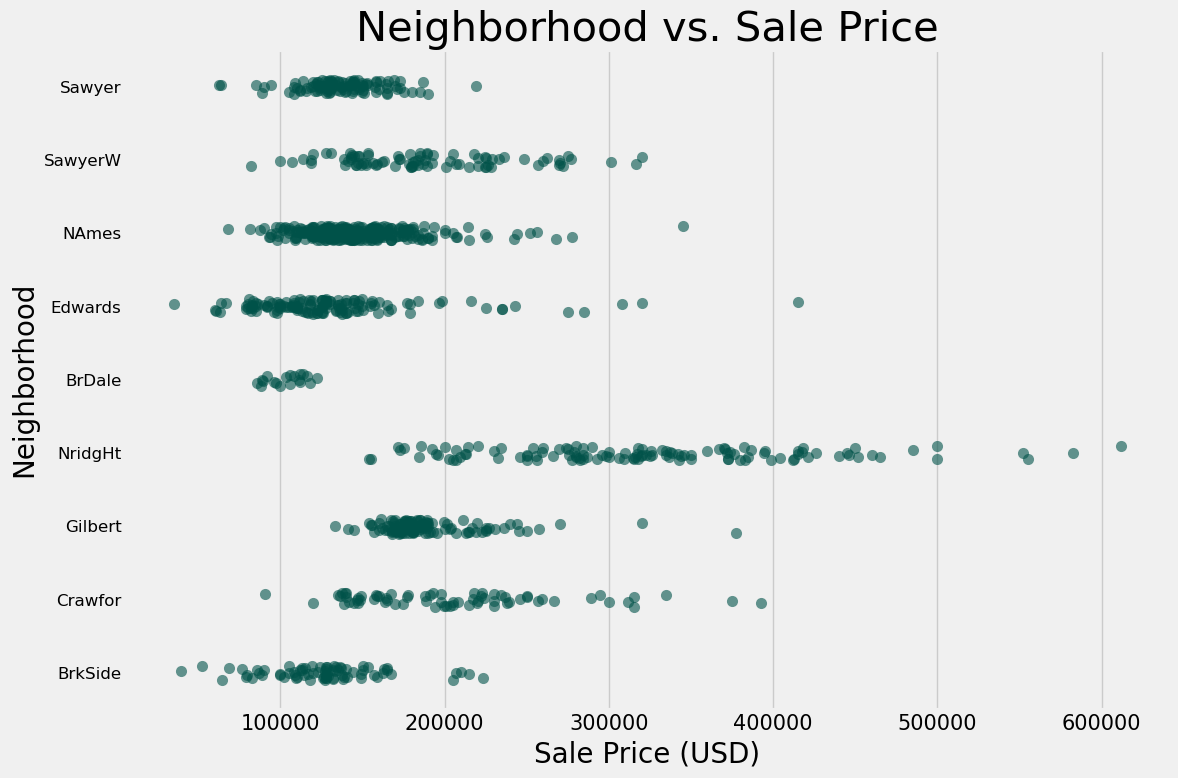

In [108]:
nhood_for_plot = ['NAmes',
                  'Sawyer',
                  'CollegeCr',
                  'NridgHt',
                  'BrkSide',
                  'Gilbert',
                  'BrDale',
                  'Edwards',
                  'SawyerW',
                  'Crawfor']

neighborhood_plot_data = house_data[house_data['neighborhood'].isin(nhood_for_plot)]

plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

#Plot
sns.stripplot(data = neighborhood_plot_data, 
                x = 'saleprice', 
                y = 'neighborhood', 
                alpha = 0.6,
                color = 'xkcd:dark blue green',
               s = 8,)
#Titles and labels
plt.xlabel('Sale Price (USD)', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 12)
plt.ylabel('Neighborhood', size = 20)
plt.title('Neighborhood vs. Sale Price', size = 30)

plt.tight_layout()
#plt.savefig('../Plot_Images/stripplot_nhood_vs_price.png', dpi = 192);

A presentation ready scatterplot that only shows a handful of neighborhoods so it's not overwhelming to look at.

#### Overall Condition Feature Cleaning and EDA

In [12]:
neighborhood_plot_data = house_data['neighborhood'].isin(nhood_for_plot)

Overall condition is a number from 1 to 10.  1 is considered 'Very Poor' and 10 is considered 'Very Excellent'

In [13]:
# Doesn't look like there are any null values for this feature.  I want to change this datatype to a string since they are ordinal and not used
# for maths.
print(house_data['overall_cond'].info())
house_validate['overall_cond'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: overall_cond
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.2 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: overall_cond
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [14]:
# There are no homes in excellent condition.  Most seem split down the middle.
print(house_data['overall_cond'].value_counts())
house_validate['overall_cond'].value_counts()

overall_cond
5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: count, dtype: int64


overall_cond
5    485
6    165
7    120
8     43
4     31
3     15
9     12
2      4
1      3
Name: count, dtype: int64

In [15]:
#Changing dtypes to strings because this is ordinal data
house_data['overall_cond'] = house_data['overall_cond'].astype('str')
house_validate['overall_cond'] = house_validate['overall_cond'].astype('str')

In [16]:
print(house_data['overall_cond'].describe())
house_validate['overall_cond'].describe()

count     2051
unique       9
top          5
freq      1168
Name: overall_cond, dtype: object


count     878
unique      9
top         5
freq      485
Name: overall_cond, dtype: object

This barplot shows the average price of a home based on the home's conditon.  There looks to be a nice positive linear relationship here except for houses with an overall condition of 5. I believe this is occuring because there are many more houses sold at a 5 overall condition than any others. 

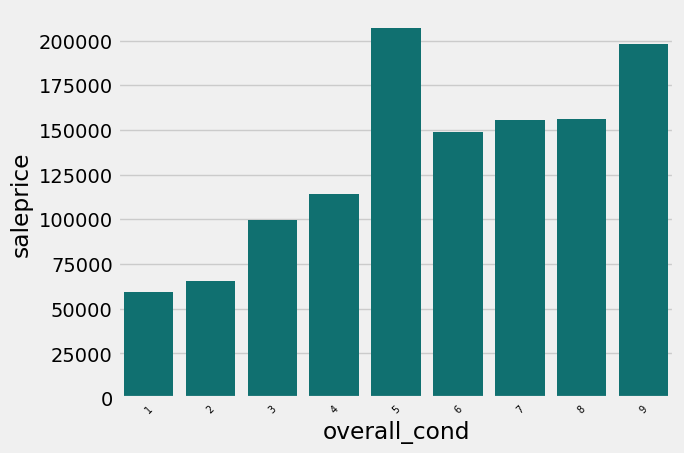

In [17]:
sns.barplot(data = house_data, x = 'overall_cond', y = 'saleprice', color = 'teal', errorbar = None ,order = ['1', '2', '3','4','5','6','7','8','9'])
plt.xticks(rotation = 45, fontsize = 7);

#### Building Type Feature Cleaning and EDA


In [18]:
#No NaNs!
print(house_data['bldg_type'].isna().sum())
house_validate['bldg_type'].isna().sum()

0


0

In [19]:
# I don't see a Twnhsl as indicated by the data dictionary.  I will assume Twnhs is a 'Townhouse Inside Unit'
print(house_data['bldg_type'].unique())
house_validate['bldg_type'].unique()

['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']


array(['2fmCon', 'Duplex', '1Fam', 'TwnhsE', 'Twnhs'], dtype=object)

In [20]:
# Values are objects which is correct
print(house_data['bldg_type'].info())
house_validate['bldg_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: bldg_type
Non-Null Count  Dtype 
--------------  ----- 
2051 non-null   object
dtypes: object(1)
memory usage: 16.2+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: bldg_type
Non-Null Count  Dtype 
--------------  ----- 
878 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [21]:
# Single Family Detached Homes are popular!
print(house_data['bldg_type'].describe())
house_validate['bldg_type'].describe()

count     2051
unique       5
top       1Fam
freq      1700
Name: bldg_type, dtype: object


count      878
unique       5
top       1Fam
freq       724
Name: bldg_type, dtype: object

It looks as if one could narrow in on a price depending on what type of building it, except for the 1Fam (Single-family Detached) home.  My intuition suggests that the differences in price could be due to location or amenties like a garage or pool.

C:\Users\khalb\AppData\Local\Temp\ipykernel_17504\3124777857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = house_data, x = 'bldg_type', y = 'saleprice', palette = tableau)
C:\Users\khalb\AppData\Local\Temp\ipykernel_17504\3124777857.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(data = house_data, x = 'bldg_type', y = 'saleprice', palette = tableau)


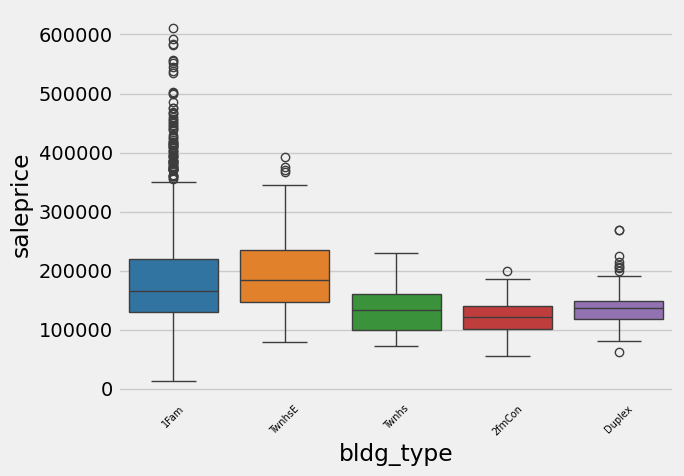

In [105]:
tableau = sns.color_palette('tab10')
sns.boxplot(data = house_data, x = 'bldg_type', y = 'saleprice', palette = tableau)
plt.xticks(rotation = 45, fontsize = 7);

#### Utilities Feature Cleaning and EDA

After exploring the utilities data, I chose not to use this as a feature.  All except two observations have the same value for untilities so I don't think this would help the model.  I have kept my work in this notebook to indicate why this choice was made.


In [23]:
# Datatype is an object
print(house_data['utilities'].info())
house_validate['utilities'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: utilities
Non-Null Count  Dtype 
--------------  ----- 
2051 non-null   object
dtypes: object(1)
memory usage: 16.2+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: utilities
Non-Null Count  Dtype 
--------------  ----- 
878 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [24]:

print(house_data['utilities'].unique())
house_validate['utilities'].unique()

['AllPub' 'NoSeWa' 'NoSewr']


array(['AllPub', 'NoSewr'], dtype=object)

Almost all values are 'AllPub' so will not use this as a feature.

In [25]:
house_data['utilities'].value_counts()

utilities
AllPub    2049
NoSeWa       1
NoSewr       1
Name: count, dtype: int64

#### Kitchen Quality Feature Cleaning and EDA

Kitchen condition incldues ratings: Excellent, Good, Typical/Average, Fair, and Poor

In [26]:
# No NaNs - data is a string
print(house_data['kitchen_qual'].info())
house_validate['kitchen_qual'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: kitchen_qual
Non-Null Count  Dtype 
--------------  ----- 
2051 non-null   object
dtypes: object(1)
memory usage: 16.2+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: kitchen_qual
Non-Null Count  Dtype 
--------------  ----- 
878 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [27]:
print(house_data['kitchen_qual'].describe())
house_validate['kitchen_qual'].describe()

count     2051
unique       4
top         TA
freq      1047
Name: kitchen_qual, dtype: object


count     878
unique      5
top        TA
freq      447
Name: kitchen_qual, dtype: object

Since there is only one obervation of a house with a poor kitchen in the validate set, I will drop that row.  One row is insignificant.

In [28]:
print(house_data['kitchen_qual'].value_counts())
house_validate['kitchen_qual'].value_counts()

kitchen_qual
TA    1047
Gd     806
Ex     151
Fa      47
Name: count, dtype: int64


kitchen_qual
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: count, dtype: int64

In [29]:
# Changing the row with 'Po' as a value in the validate column to 'Fa'.  I can't drop this or Kaggle generates an error so it makes the most logical sense
# to move it to the next tier of 'Fa'.
house_validate[house_validate['kitchen_qual'] == 'Po']
# row 362
house_validate.loc[362, 'kitchen_qual'] = 'Fa'

In [30]:
# Po value replaced with Fa
house_validate['kitchen_qual'].value_counts()

kitchen_qual
TA    447
Gd    354
Ex     53
Fa     24
Name: count, dtype: int64

In [31]:
# Checking that value is gone
house_validate['kitchen_qual'].value_counts()

kitchen_qual
TA    447
Gd    354
Ex     53
Fa     24
Name: count, dtype: int64

I think this feature is a good option for ordinal encoding, but I don't know how to implement yet.  Instead I will replace the values with integers, the higher the number, the better the score.

In [32]:
house_data['kitchen_qual'].replace({'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}, inplace = True)
house_validate['kitchen_qual'].replace({'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}, inplace = True)

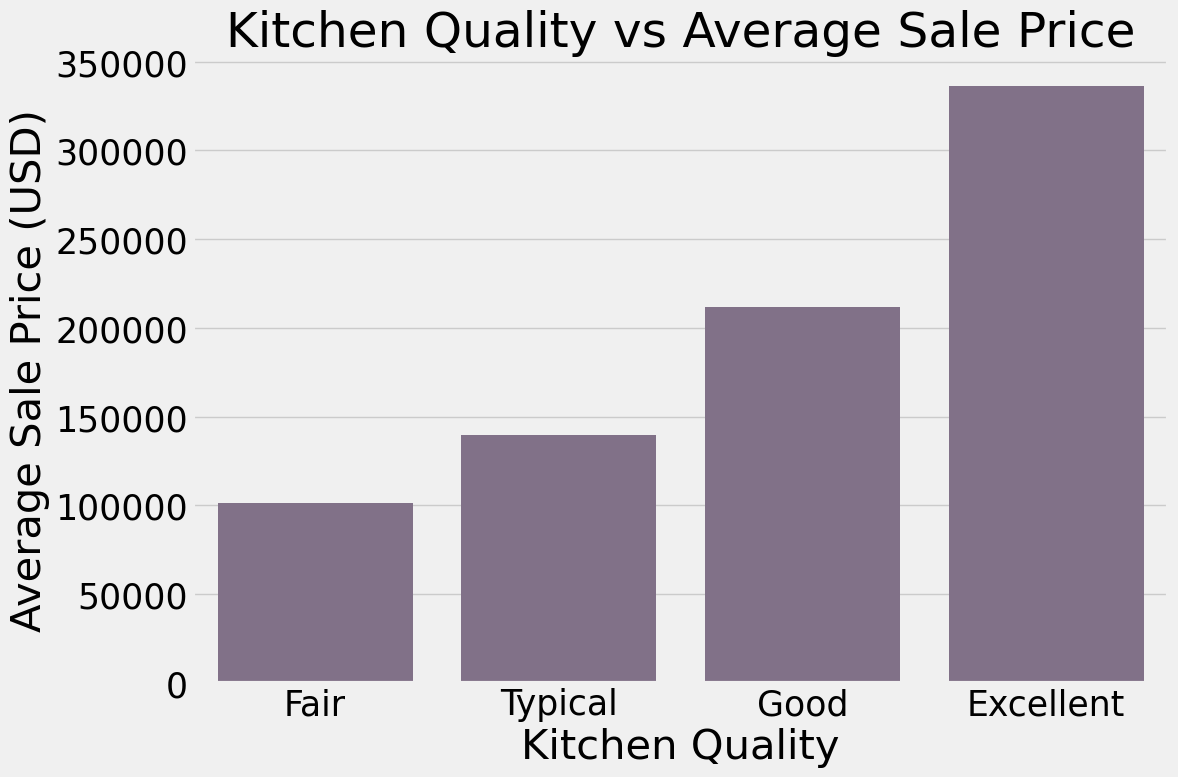

In [85]:
# Seems that people are willing to pay for a good quality kitchen
plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

sns.barplot(data = house_data,
            x = 'kitchen_qual',
            y = 'saleprice',
            color = 'xkcd:grey purple',
           errorbar = None)

plt.xticks([0, 1, 2, 3], ['Fair', 'Typical', 'Good', 'Excellent'],
            fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Kitchen Quality', fontsize = 30)
plt.ylabel('Average Sale Price (USD)', fontsize = 30)
plt.title('Kitchen Quality vs Average Sale Price', fontsize = 35)

plt.tight_layout()
plt.savefig('../Plot_Images/barplot_kitchen_qual_vs_price.png', dpi = 192);

Presentation ready plot

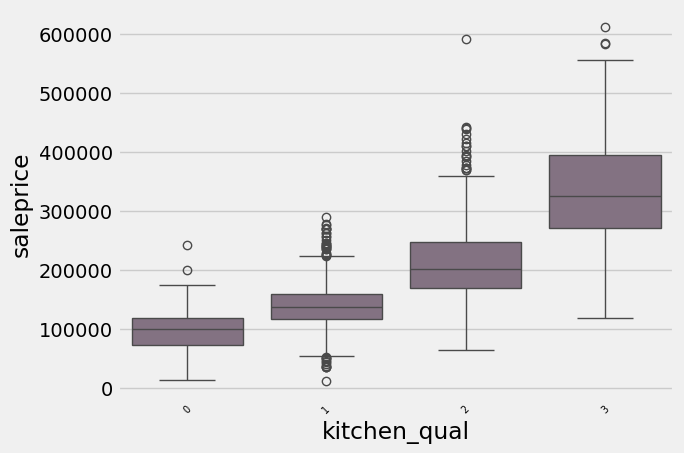

In [34]:
#A boxplot to view the data differenty.  A lot of outliers for the good(2) and typical kitchen(1) - again maybe because of location or other amenities.
sns.boxplot(data = house_data, x = 'kitchen_qual', y = 'saleprice', color = 'xkcd:purple grey')
plt.xticks(rotation = 45, fontsize = 7);

#### Exterior Quality Feature Cleaning and EDA

In [35]:
# Exterior Quality has four different categorical values.  I will transform them thne way I did kitchen quality
house_data['exter_qual'].unique()
house_validate['exter_qual'].unique()

array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object)

In [36]:
house_data['exter_qual'].replace({'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}, inplace = True)
house_validate['exter_qual'].replace({'Fa':0, 'TA':1, 'Gd':2, 'Ex':3}, inplace = True)

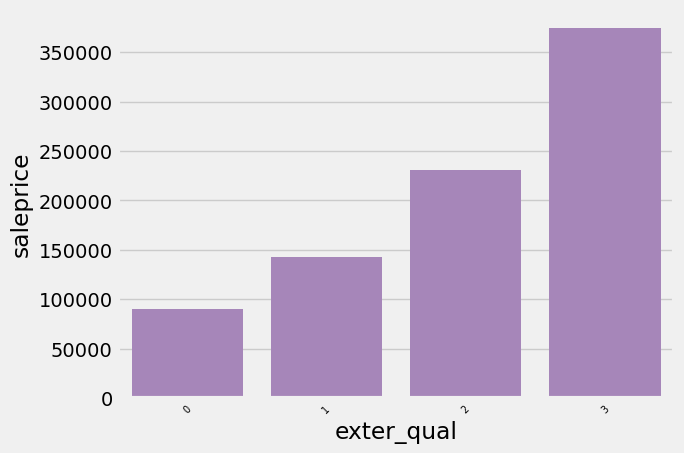

In [81]:
sns.barplot(data = house_data,
            x = 'exter_qual',
            y = 'saleprice',
            color = 'xkcd:wisteria',
           errorbar = None)
plt.xticks(rotation = 45, fontsize = 7);

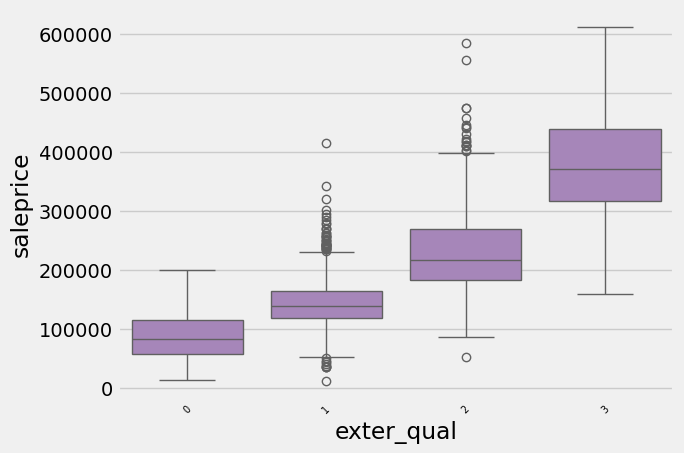

In [38]:
# Like other quality features, this relationship is also linear
sns.boxplot(data = house_data, x = 'exter_qual', y = 'saleprice', color = 'xkcd:wisteria')
plt.xticks(rotation = 45, fontsize = 7);

#### Central Air Feature Cleaning and EDA

In [39]:
# Yes or no string datatype with no NaNs
print(house_data['central_air'].info())
house_validate['central_air'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: central_air
Non-Null Count  Dtype 
--------------  ----- 
2051 non-null   object
dtypes: object(1)
memory usage: 16.2+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: central_air
Non-Null Count  Dtype 
--------------  ----- 
878 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [40]:
# More homes have central air
print(house_data['central_air'].value_counts())
house_validate['central_air'].value_counts()

central_air
Y    1910
N     141
Name: count, dtype: int64


central_air
Y    823
N     55
Name: count, dtype: int64

I am going to change Y to 1 and N to 0.

In [41]:
house_data['central_air'].replace({'Y':1, 'N':0}, inplace = True)
house_validate['central_air'].replace({'Y':1, 'N':0}, inplace = True)

In [42]:
#Check if it worked
print(house_data['central_air'].value_counts())
house_validate['central_air'].value_counts()

central_air
1    1910
0     141
Name: count, dtype: int64


central_air
1    823
0     55
Name: count, dtype: int64

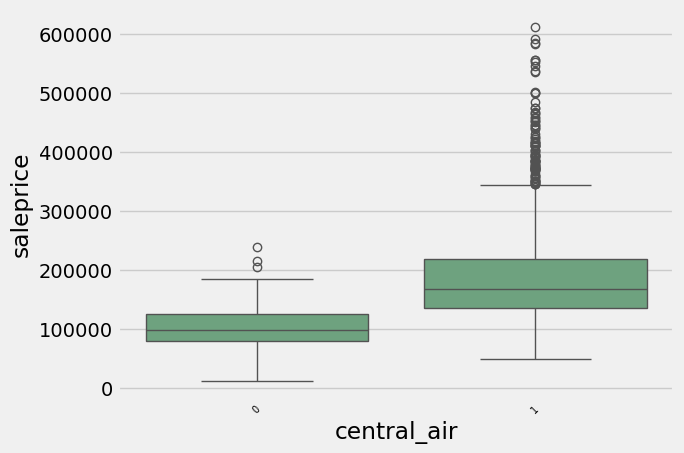

In [43]:
#Homes with central air tend to have higher sale prices than ones without - but that looks like a lot of outliers.
sns.boxplot(data = house_data, x = 'central_air', y = 'saleprice', color = 'xkcd:tea')
plt.xticks(rotation = 45, fontsize = 7);

#### Year Built Feature Cleaning and EDA

In [44]:
print(house_data['year_built'].info())
house_validate['year_built'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: year_built
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.2 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: year_built
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [45]:
house_data['year_built'].sort_values()
house_validate['year_built'].sort_values()

32     1880
27     1880
19     1882
817    1885
51     1890
       ... 
847    2009
730    2009
40     2009
315    2010
533    2010
Name: year_built, Length: 878, dtype: int64

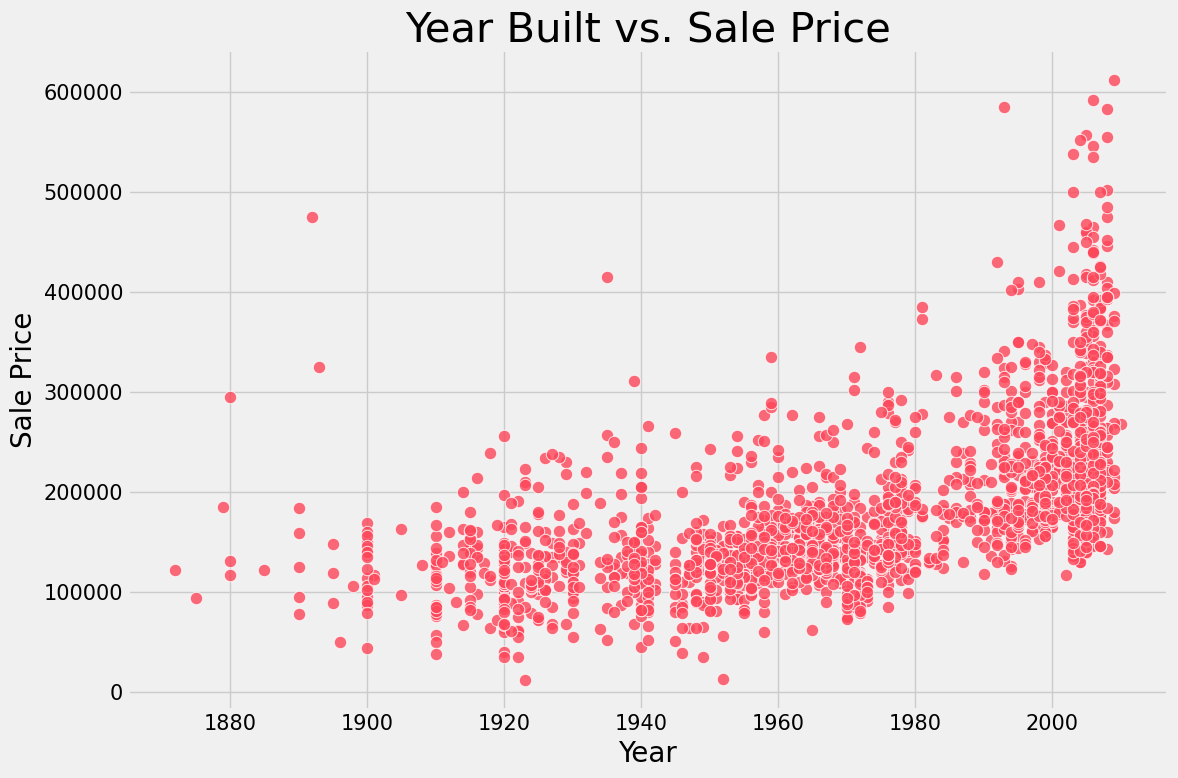

In [46]:
plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

#Plot
sns.scatterplot(data = house_data, 
                x = 'year_built', 
                y = 'saleprice', 
                alpha = 0.8,
                color = 'xkcd:watermelon',
               s = 80)
#Titles and labels
plt.xlabel('Year', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Sale Price', size = 20)
plt.title('Year Built vs. Sale Price', size = 30)
plt.tight_layout()

This looked promising, but did not improve the model scores when implemented.

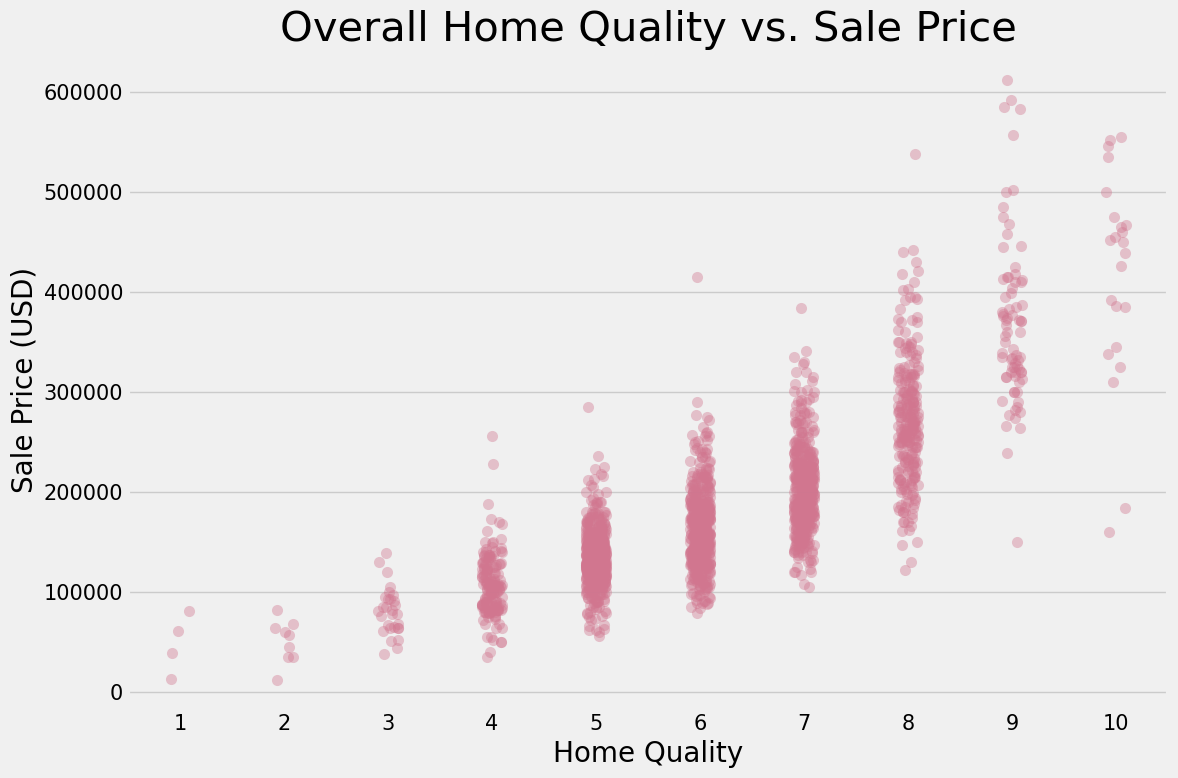

In [86]:
plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

#Plot
sns.stripplot(data = house_data, 
                x = 'overall_qual', 
                y = 'saleprice',
                alpha = 0.4,
                color = 'xkcd:muted pink',
               s = 8)
#Titles and labels
plt.xlabel('Home Quality', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Sale Price (USD)', size = 20)
plt.title('Overall Home Quality vs. Sale Price', size = 30)

plt.tight_layout()
plt.savefig('../plot_images/stripplot_overall_qual_vs_price.png', dpi = 192);

Presentation ready plot.  Clear linear relationship with overall home quality, moreso than overall condition.

In [48]:
#No nulls
house_data['overall_qual'].info()
house_validate['overall_qual'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: overall_qual
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: overall_qual
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [49]:
house_data['overall_qual'].sort_values()
house_validate['overall_qual'].sort_values()

615     2
514     2
446     2
529     2
29      3
       ..
103    10
463    10
163    10
425    10
115    10
Name: overall_qual, Length: 878, dtype: int64

### Quantitave Feature Exploration
---

A heatmap is just too large for all of the  quantitative features in this set. I used code from Alanna's Breakfast Hour to find correlating features Sale Price. I already have overall quality in my model.  Based on this, I will add gr_live_area, garage_area, total_bsmt_sf, 1st_flr_sf, andyear_built (not quantitative, but seems promising).

In [50]:
num_train_clean = house_data._get_numeric_data()
num_train_clean.corr()[['saleprice']].sort_values('saleprice', ascending = False).head(15)

,saleprice
saleprice,1.000000
overall_qual,0.800207
exter_qual,0.712146
gr_liv_area,0.697038
kitchen_qual,0.692336
garage_area,0.650270
garage_cars,0.648220
total_bsmt_sf,0.628925
1st_flr_sf,0.618486
year_built,0.571849


#### Living Room Square Feet Cleaning and EDA

These are integers and have no missing values.  Positive relationship with sale price.

In [51]:
# integers - no NaNs
print(house_data['gr_liv_area'].info())
house_validate['gr_liv_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: gr_liv_area
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.2 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: gr_liv_area
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [52]:
#No unusual values
print(house_validate['gr_liv_area'].sort_values())
house_data['gr_liv_area'].sort_values()

514     407
529     599
482     630
231     630
542     630
       ... 
484    3194
273    3447
115    3627
463    4316
170    4476
Name: gr_liv_area, Length: 878, dtype: int64


1428     334
432      438
1518     480
1643     492
1292     498
        ... 
1035    3608
1897    3672
616     3820
1885    5095
960     5642
Name: gr_liv_area, Length: 2051, dtype: int64

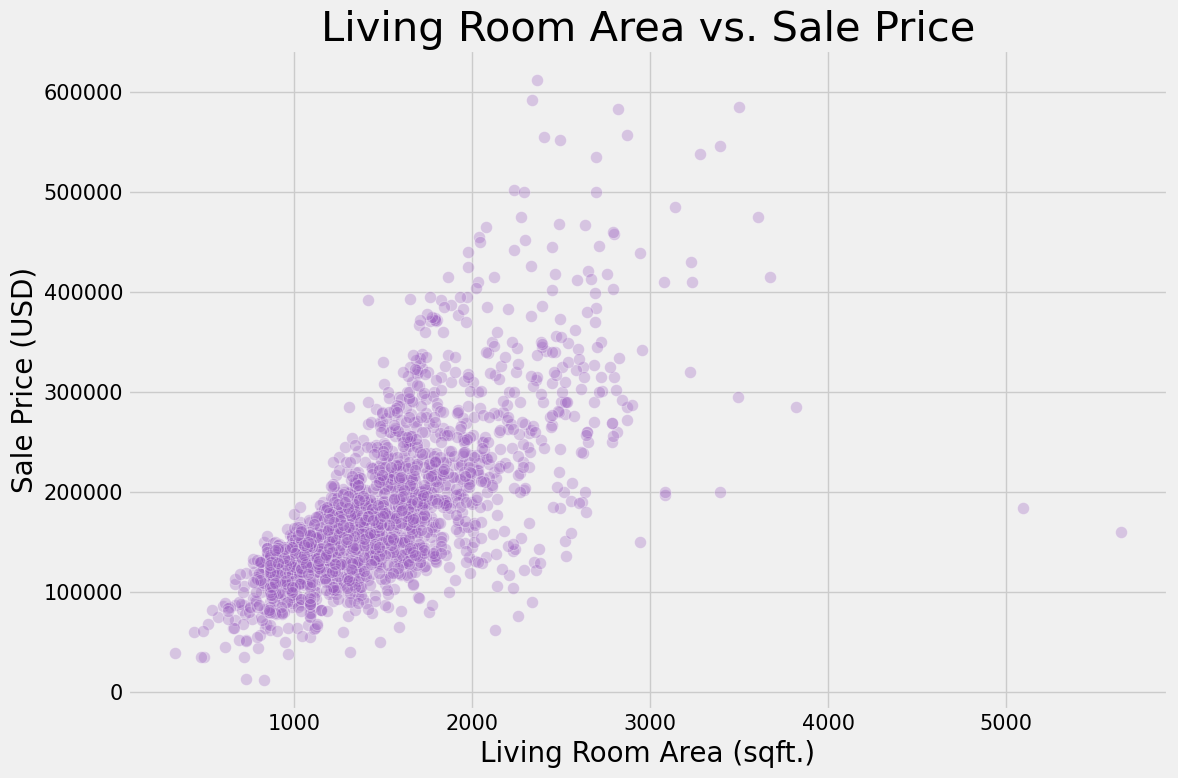

In [111]:
#Canvas and Style
plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

#Plot
sns.scatterplot(data = house_data, 
                x = 'gr_liv_area', 
                y = 'saleprice', 
                alpha = 0.3,
                color = 'xkcd:amethyst',
               s = 75)
#Titles and labels
plt.xlabel('Living Room Area (sqft.)', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Sale Price (USD)', size = 20)
plt.title('Living Room Area vs. Sale Price', size = 30)

plt.tight_layout()

#Export
plt.savefig('../Plot_Images/scatter_livingroom_sqft_vs_price.png', dpi = 192);

Presentation ready plot.  Positive correlation betweeen Living Room area and sale price.

#### Garage Area Cleaning and EDA

In [54]:
print(house_data['garage_area'].info())
house_validate['garage_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: garage_area
Non-Null Count  Dtype  
--------------  -----  
2050 non-null   float64
dtypes: float64(1)
memory usage: 16.2 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: garage_area
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


Only one observation in the training set has a NaN for garage area.  Checking the specific row indicates that there is a detached garage.  I will calculate the mean for all detached garages in the data set and assign it to this observation.

In [55]:
house_data[house_data['garage_area'].isna()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [56]:
house_data[house_data['garage_area'].isna()]
house_data.loc[1712, 'garage_type']

'Detchd'

In [57]:
homes_with_detchd_garage = house_data[house_data['garage_type'] == 'Detchd']
homes_with_detchd_garage['garage_area'].mean()

419.54392523364487

In [58]:
house_data.loc[1712, 'garage_area'] = 419.54
house_data.loc[1712, 'garage_area']
house_data['garage_area'].isna().sum()

0

It looks like there are 113 homes with no garages and therefore, no areas to report.  I will leave these values at zero.

In [59]:
homes_with_no_garage_area = house_data[house_data['garage_area'] == 0]
print(homes_with_no_garage_area['garage_type'].isna().sum())
homes_with_no_garage_area['garage_area'].info()


113
<class 'pandas.core.series.Series'>
Index: 113 entries, 28 to 2042
Series name: garage_area
Non-Null Count  Dtype  
--------------  -----  
113 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [60]:
house_data[house_data['garage_area'] == 0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,93900


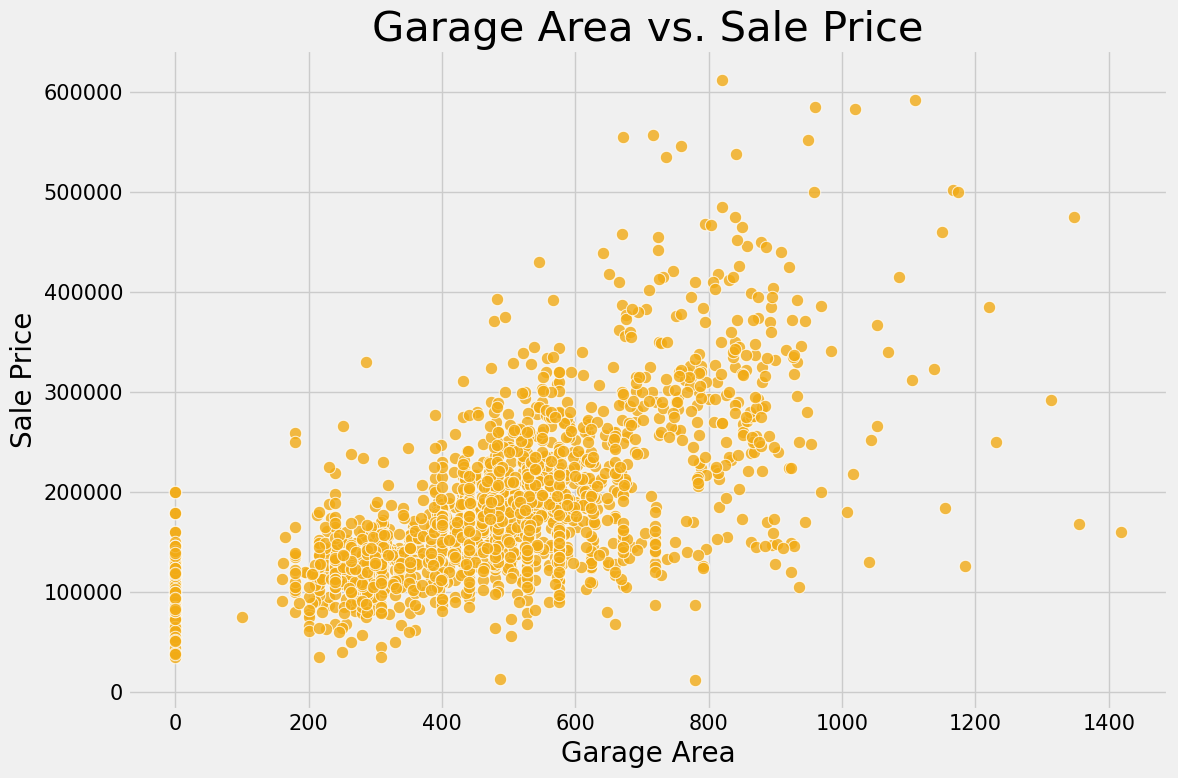

In [61]:
#Canvas and Style
plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

#Plot
sns.scatterplot(data = house_data, 
                x = 'garage_area', 
                y = 'saleprice', 
                alpha = 0.8,
                color = 'xkcd:squash',
               s = 80)
#Titles and labels
plt.xlabel('Garage Area', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Sale Price', size = 20)
plt.title('Garage Area vs. Sale Price', size = 30)
plt.tight_layout()

Another positive linear relationship with garage area and sale price.  THere are some values that are zero, but that is because the house does not have a garage.

#### Total Basement Area Cleaning and EDA

In [62]:
house_data['total_bsmt_sf'].info()
#house_validate['total_bsmt_sf'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: total_bsmt_sf
Non-Null Count  Dtype  
--------------  -----  
2050 non-null   float64
dtypes: float64(1)
memory usage: 16.2 KB


In [63]:
house_data['total_bsmt_sf'].sort_values()
house_validate['total_bsmt_sf'].sort_values()

625       0
78        0
112       0
527       0
37        0
       ... 
170    2396
463    2444
103    2535
756    2552
163    2630
Name: total_bsmt_sf, Length: 878, dtype: int64

Much like the garage area data, the basement area has one NaN in the training set and zeroes where there is no basement with the home.  The 'bsmt_cond' column is NA if the home has no basement

In [64]:
house_data[house_data['total_bsmt_sf'].isna()]
house_data.loc[1327, 'bsmt_cond']

nan

In [65]:
house_data.loc[1327, 'total_bsmt_sf'] = 0
house_data.loc[1327, 'total_bsmt_sf']
house_data['total_bsmt_sf'].isna().sum()

0

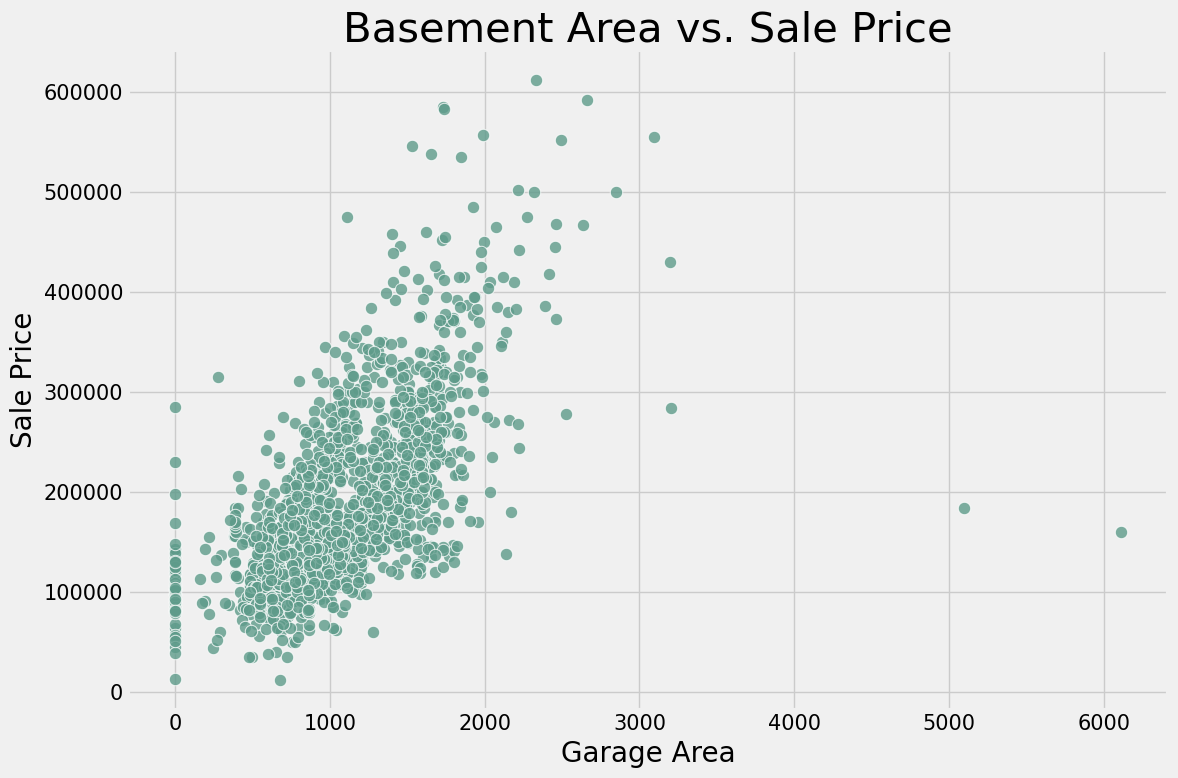

In [66]:
#Canvas and Style
plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

#Plot
sns.scatterplot(data = house_data, 
                x = 'total_bsmt_sf', 
                y = 'saleprice', 
                alpha = 0.8,
                color = 'xkcd:grey teal',
               s = 80)
#Titles and labels
plt.xlabel('Garage Area', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Sale Price', size = 20)
plt.title('Basement Area vs. Sale Price', size = 30)

plt.tight_layout()

Positive correlation with basement area and sale price.  Again, zero basement area means the house does not have a basement.

#### First FloorArea Cleaning and EDA

In [67]:
#No NaNs
house_data['1st_flr_sf'].info()
house_validate['1st_flr_sf'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: 1st_flr_sf
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: 1st_flr_sf
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [68]:
#Values make sense
house_data['1st_flr_sf'].sort_values(ascending = False)
house_validate['1st_flr_sf'].sort_values(ascending = False)

163    2674
756    2552
628    2522
103    2470
463    2444
       ... 
371     483
287     483
29      442
148     432
514     407
Name: 1st_flr_sf, Length: 878, dtype: int64

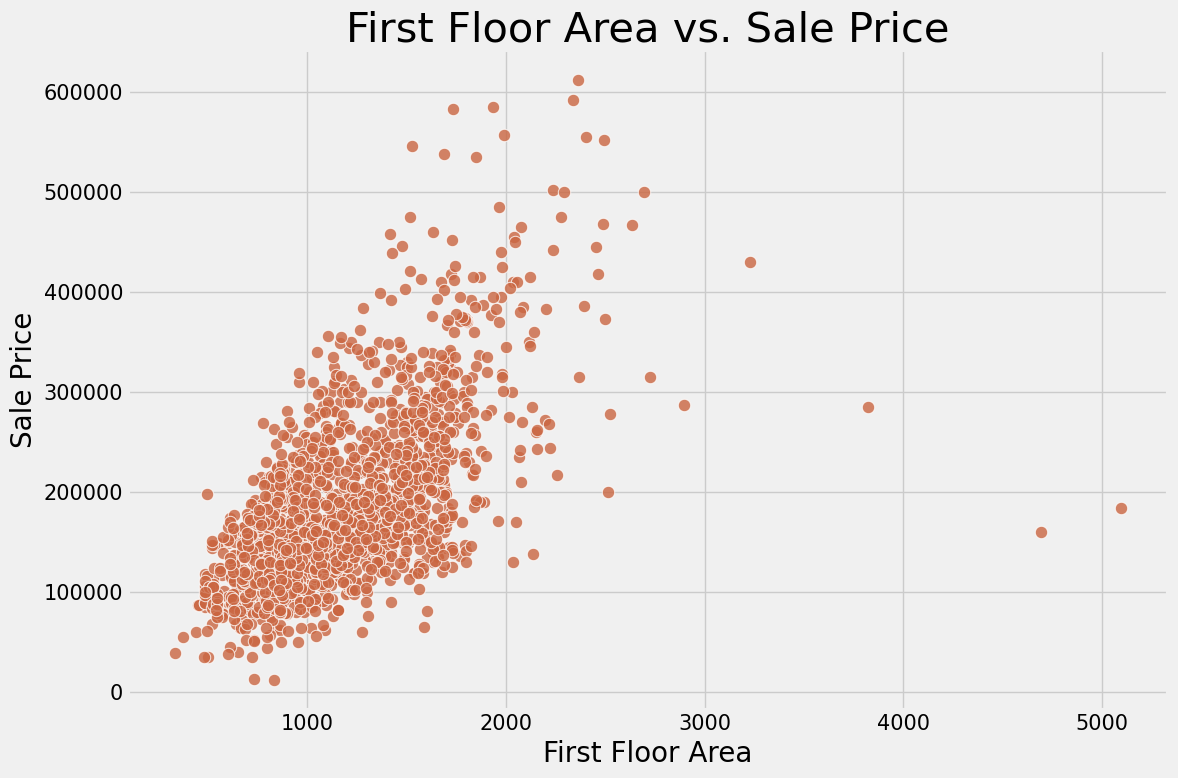

In [69]:
#Canvas and Style
plt.figure(figsize = (12,8))
plt.style.use("fivethirtyeight")

#Plot
sns.scatterplot(data = house_data, 
                x = '1st_flr_sf', 
                y = 'saleprice', 
                alpha = 0.8,
                color = 'xkcd:terracotta',
               s = 80)
#Titles and labels
plt.xlabel('First Floor Area', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Sale Price', size = 20)
plt.title('First Floor Area vs. Sale Price', size = 30)

plt.tight_layout()

#### Number of Bedrooms Cleaning and EDA

The area of first floors in homes has a positive correlation with sale price.

In [70]:
house_data['bedroom_abvgr'].info()
house_validate['bedroom_abvgr'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2051 entries, 0 to 2050
Series name: bedroom_abvgr
Non-Null Count  Dtype
--------------  -----
2051 non-null   int64
dtypes: int64(1)
memory usage: 16.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 878 entries, 0 to 877
Series name: bedroom_abvgr
Non-Null Count  Dtype
--------------  -----
878 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [71]:
house_data['bedroom_abvgr'].sort_values()
house_validate['bedroom_abvgr'].sort_values()

221    0
842    0
543    0
238    1
526    1
      ..
177    6
314    6
813    6
350    6
779    6
Name: bedroom_abvgr, Length: 878, dtype: int64

While it's possible houses don't have bedrooms, one of the descriptors in the dataset have anything like 'studio'.  I do not see many of these in either set, so I will set it to average value.

**Full Disclosure!**<br>
I really wanted to put in average values for the homes that have '0' as bedrooms.  I thought the SimpleImputer could do this, but it won't change those values.  I consulted ChatGPT to get clarification on what the function can and can't do and it mentioned changing the zeros to NaN values and then using SimpleImputer to then transform those values into something else.

I want to showcase all of the tools we've learned, so I will do that.  Not sure if it really makes a difference for the model as there are not many observations with zero bedrooms, but it's good practice (also I'm on a deadline~)

In [72]:
zero_bedroom = house_data[house_data['bedroom_abvgr'] == 0]
zero_bedroom

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
191,2119,906475170,20,RL,155.0,20064,Pave,NaN,IR1,Low,...,0,0,NaN,NaN,NaN,0,5,2007,WD,279000
346,2724,905200490,80,RL,NaN,10246,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2006,WD,145000
744,1386,905200090,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2008,WD,108959
1308,1000,527127140,120,RL,41.0,4923,Pave,NaN,Reg,Lvl,...,224,0,NaN,NaN,NaN,0,8,2008,WD,286000
1571,2523,533350050,20,RL,68.0,50271,Pave,NaN,IR1,Low,...,0,0,NaN,NaN,NaN,0,11,2006,WD,385000


In [73]:
house_data['bedroom_abvgr'] = house_data['bedroom_abvgr'].replace(0, np.nan)
house_validate['bedroom_abvgr'] = house_data['bedroom_abvgr'].replace(0, np.nan)
house_data['bedroom_abvgr'].sort_values()

779     1.0
1351    1.0
618     1.0
1269    1.0
501     1.0
       ... 
191     NaN
346     NaN
744     NaN
1308    NaN
1571    NaN
Name: bedroom_abvgr, Length: 2051, dtype: float64

### Export Clean CSV files
---

In [74]:
house_data.head()
#house_data.to_csv('../datasets/train_clean.csv', index = False)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [75]:
house_validate.head()
#house_validate.to_csv('../datasets/validate_clean.csv', index = False)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
